# CS 109A Milestone 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>

Import libraries

In [76]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import math 

## Train Data EDA (based on train.csv)

In [8]:
df_train=pd.read_csv("train.csv",parse_dates=['Date'],date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))
print df_train.describe()
df_train.head()

              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.00000

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
df_test=pd.read_csv("test.csv",parse_dates=['Date'],date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))
print df_test.describe()
df_test.head()

                 Id         Store     DayOfWeek          Open         Promo  \
count  41088.000000  41088.000000  41088.000000  41077.000000  41088.000000   
mean   20544.500000    555.899533      3.979167      0.854322      0.395833   
std    11861.228267    320.274496      2.015481      0.352787      0.489035   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%    10272.750000    279.750000      2.000000           NaN      0.000000   
50%    20544.500000    553.500000      4.000000           NaN      0.000000   
75%    30816.250000    832.250000      6.000000           NaN      1.000000   
max    41088.000000   1115.000000      7.000000      1.000000      1.000000   

       SchoolHoliday  
count   41088.000000  
mean        0.443487  
std         0.496802  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
print "Number of unique stores is training data: ", len(df_train.Store.unique())
print "Number of unique stores is testing data: ", len(df_test.Store.unique())
print "How many stores in test data are also in training data? ",len(np.intersect1d(df_train.Store.unique(),df_test.Store.unique()))

Number of unique stores is training data:  1115
Number of unique stores is testing data:  856
How many stores in test data are also in training data?  856


### Holidays and Sales

Unique values of StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values of SchoolHoliday: [1 0]


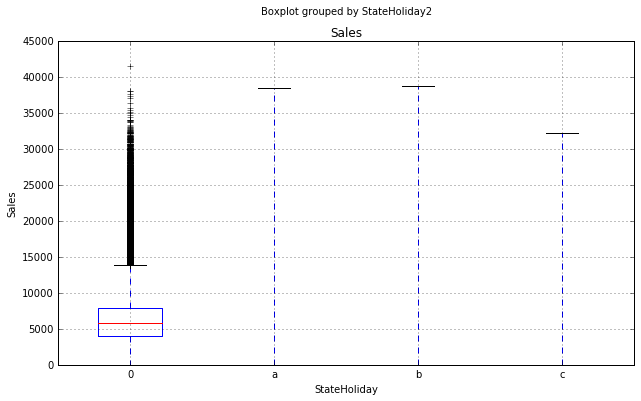

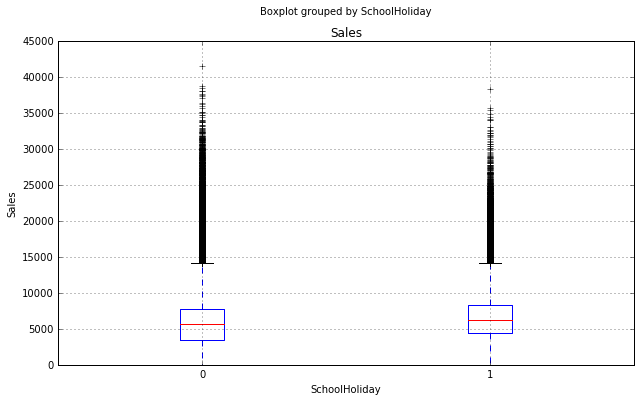

In [11]:
#Research relationshop between StateHoliday and sales
StateHoliday=[]
for row in df_train['StateHoliday']:
    if row == 0 or row == '0':
        StateHoliday.append(0)
    else:
        StateHoliday.append(row)
df_train['StateHoliday2']=StateHoliday
ax3=df_train.boxplot(column=['Sales'],by=['StateHoliday2'],figsize=(10,6))
ax3.set_xlabel("StateHoliday")
ax3.set_ylabel("Sales")
print "Unique values of StateHoliday:",df_train.StateHoliday.unique()

#Research relationshop between SchoolHoliday and sales
ax3=df_train.boxplot(column=['Sales'],by=['SchoolHoliday'],figsize=(10,6))
ax3.set_xlabel("SchoolHoliday")
ax3.set_ylabel("Sales")
print "Unique values of SchoolHoliday:",df_train.SchoolHoliday.unique()

### Promotions and Sales

Unique values of Promo: [1 0]
The mean amount spent per customer for days without Promo: 8.50878812933
The mean amount spent per customer for days with Promo: 9.74413339444


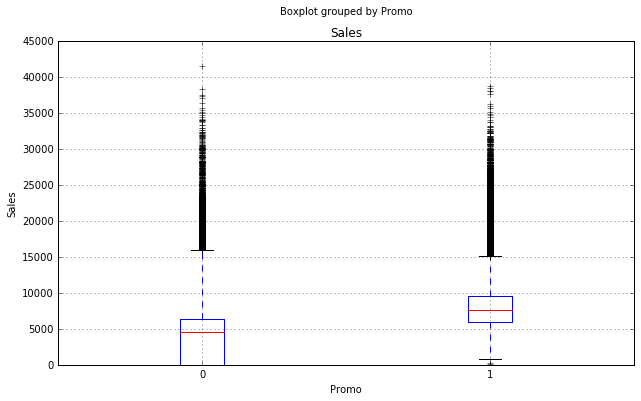

In [114]:
#Research relationshop between Promotion and sales
ax2=df_train.boxplot(column=['Sales'],by=['Promo'],figsize=(10,6))
ax2.set_xlabel("Promo")
ax2.set_ylabel("Sales")
print "Unique values of Promo:",df_train.Promo.unique()

print "The mean amount spent per customer for days without Promo:", df_train[(df_train['Sales']> 0) & (df_train['Promo']==0)]['Sales'].mean()/df_train[(df_train['Sales']> 0) & (df_train['Promo']==0)]['Customers'].mean()
print "The mean amount spent per customer for days with Promo:", df_train[(df_train['Sales']> 0) & (df_train['Promo']==1)]['Sales'].mean()/df_train[(df_train['Sales']> 0) & (df_train['Promo']==1)]['Customers'].mean()

### Store (Open or Not) and Sales

In [75]:
Sales2=[]
for row in df_train['Sales']:
    if row == 0:
        Sales2.append('No Sales')
    else:
        Sales2.append('Sales')
df_train['SalesOrNot']=Sales2
print df_train.groupby(['Promo','SalesOrNot'])['Store'].count().unstack()
print df_train.groupby(['Open','SalesOrNot'])['Store'].count().unstack()

SalesOrNot  No Sales   Sales
Promo                       
0             161666  467463
1              11205  376875
SalesOrNot  No Sales     Sales
Open                          
0           172817.0       NaN
1               54.0  844338.0


### Weekdays and Sales

Unique values of DayofWeek: [5 4 3 2 1 7 6]


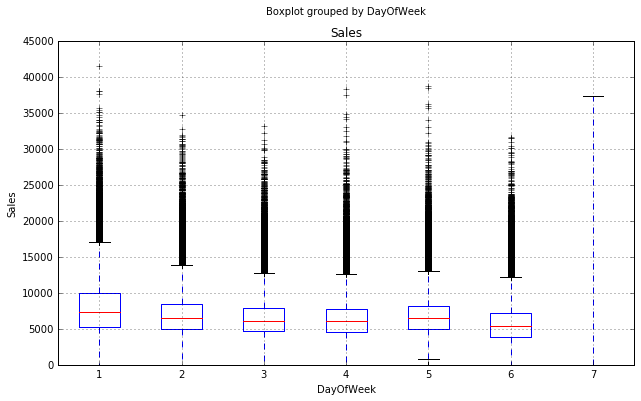

In [14]:
#Research relationshop between Day Of Week and sales
ax1=df_train.boxplot(column=['Sales'],by=['DayOfWeek'],figsize=(10,6))
ax1.set_xlabel("DayOfWeek")
ax1.set_ylabel("Sales")
print "Unique values of DayofWeek:", df_train.DayOfWeek.unique()

### SPECIAL Sunday !

In [15]:
Sunday=[]
for row in df_train['DayOfWeek']:
    if row == 7:
        Sunday.append('Sunday')
    else:
        Sunday.append('Not Sunday')
df_train['SundayOrNot']=Sunday

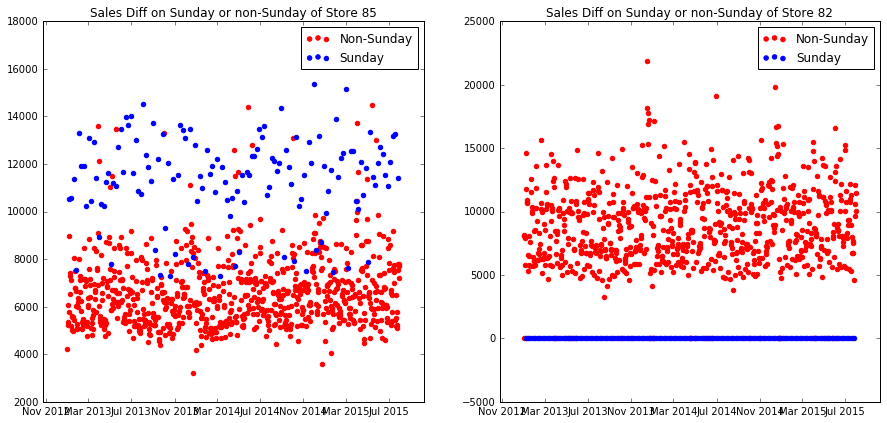

In [16]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(221)
ax1.scatter(df_train[(df_train['Store']==85) & (df_train['DayOfWeek']!=7)]['Date'].values,
            df_train[(df_train['Store']==85) & (df_train['DayOfWeek']!=7)]['Sales'].values,
            label="Non-Sunday", color='r')
ax1.scatter(df_train[(df_train['Store']==85) & (df_train['DayOfWeek']==7)]['Date'].values,
            df_train[(df_train['Store']==85) & (df_train['DayOfWeek']==7)]['Sales'].values,
            label='Sunday', color='b')
ax1.set_title("Sales Diff on Sunday or non-Sunday of Store 85")
ax1.legend(loc='best')

ax2=fig.add_subplot(222)
ax2.scatter(df_train[(df_train['Store']==82) & (df_train['DayOfWeek']!=7)]['Date'].values,
            df_train[(df_train['Store']==82) & (df_train['DayOfWeek']!=7)]['Sales'].values,
            label="Non-Sunday",color='r')
ax2.scatter(df_train[(df_train['Store']==82) & (df_train['DayOfWeek']==7)]['Date'].values,
            df_train[(df_train['Store']==82) & (df_train['DayOfWeek']==7)]['Sales'].values,
            label="Sunday",color='b')
ax2.set_title("Sales Diff on Sunday or non-Sunday of Store 82")
ax2.legend(loc='best')

We can tell that number of customer is not available in test dataset, so we might not be able to include it into our analysis boundry. 

### Time Series Analysis

In [103]:
var_name = 'Date'

df_train[var_name + 'Day'] = pd.Index(df_train[var_name]).day
df_train[var_name + 'Week'] = pd.Index(df_train[var_name]).week
df_train[var_name + 'Month'] = pd.Index(df_train[var_name]).month
df_train[var_name + 'Year'] = pd.Index(df_train[var_name]).year
df_train[var_name + 'DayOfYear'] = pd.Index(df_train[var_name]).dayofyear

df_train[var_name + 'Day'] = df_train[var_name + 'Day'].fillna(0)
df_train[var_name + 'Week'] = df_train[var_name + 'Week'].fillna(0)
df_train[var_name + 'Month'] = df_train[var_name + 'Month'].fillna(0)
df_train[var_name + 'Year'] = df_train[var_name + 'Year'].fillna(0)
df_train[var_name + 'DayOfYear'] = df_train[var_name + 'DayOfYear'].fillna(0)

In [106]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHoliday2,SalesOrNot,SundayOrNot,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,0,Sales,Not Sunday,31,31,7,2015,212
1,2,5,2015-07-31,6064,625,1,1,0,1,0,Sales,Not Sunday,31,31,7,2015,212
2,3,5,2015-07-31,8314,821,1,1,0,1,0,Sales,Not Sunday,31,31,7,2015,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,Sales,Not Sunday,31,31,7,2015,212
4,5,5,2015-07-31,4822,559,1,1,0,1,0,Sales,Not Sunday,31,31,7,2015,212


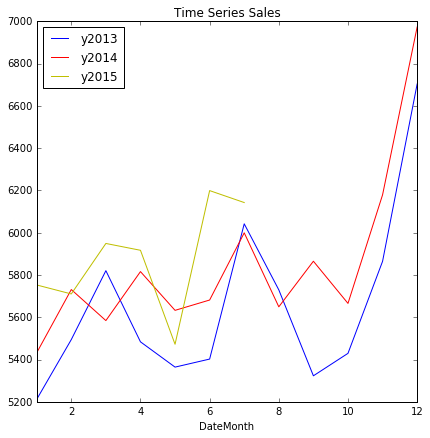

In [107]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(221)
ax1=df_train[(df_train['DateYear']==2013)].groupby(['DateMonth'])['Sales'].mean().plot(color='b',label="y2013")
ax1=df_train[(df_train['DateYear']==2014)].groupby(['DateMonth'])['Sales'].mean().plot(color='r',label="y2014")
ax1=df_train[(df_train['DateYear']==2015)].groupby(['DateMonth'])['Sales'].mean().plot(color='y',label="y2015")
ax1.legend(loc='best')
ax1.set_title("Time Series Sales")


## Store Data + Train Data Combined EDA (based on train.csv and store.csv)

In [19]:
df_store=pd.read_csv("store.csv")
print df_store.describe()
df_store.head()

            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000                  NaN                        NaN   
50%     558.00000                  NaN                        NaN   
75%     836.50000                  NaN                        NaN   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [74]:
print df_store.groupby(['StoreType','Assortment'])['Store'].count().unstack()

Assortment      a    b      c
StoreType                    
a           381.0  NaN  221.0
b             7.0  9.0    1.0
c            77.0  NaN   71.0
d           128.0  NaN  220.0


### Competition Distance Research

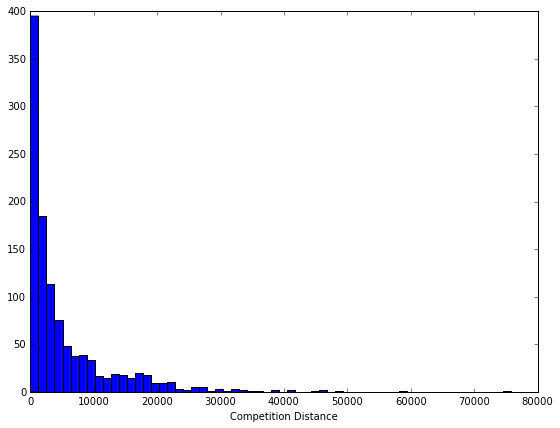

In [115]:
#Research competition Distance
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(221)
ax1.hist(df_store[(df_store['CompetitionDistance']>=0)]['CompetitionDistance'].values, bins=60)
ax1.set_xlabel("Competition Distance")

We can tell a very slight negative relationship between competition distance and sales. 

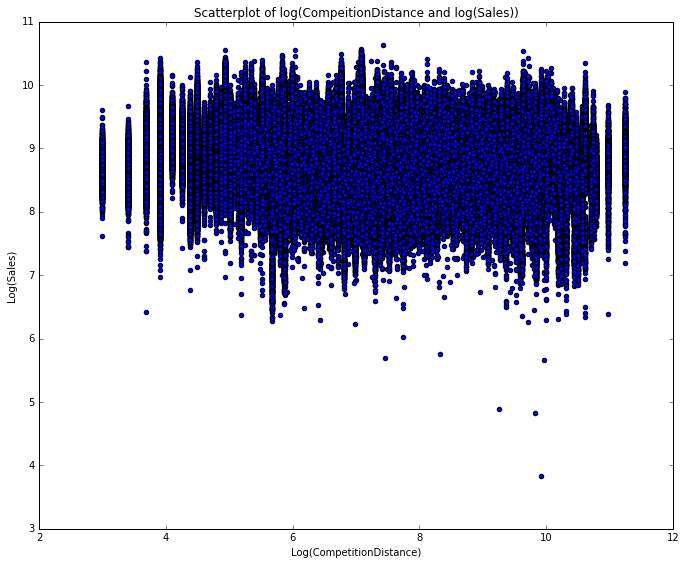

In [112]:
df_merge=pd.merge(df_train, df_store, on='Store', how='left')
df_merge['logDist']=np.log(df_merge['CompetitionDistance'].values)
df_merge['logSales']=np.log(df_merge['Sales'].values)

fig=plt.figure(figsize=(25,20))
ax1=fig.add_subplot(221)
ax1.scatter(df_merge[(df_merge['Sales']!=0) & (df_merge['CompetitionDistance']>=0)]['logDist'].values,
            df_merge[(df_merge['Sales']!=0) & (df_merge['CompetitionDistance']>=0)]['logSales'].values)
ax1.set_title("Scatterplot of log(CompeitionDistance and log(Sales))")
ax1.set_xlabel("Log(CompetitionDistance)")
ax1.set_ylabel("Log(Sales)")
ax1.legend(loc='best')

We can see that the histogram of competition distance are extremly right-skewed, so most of stores have competitors within 1k meters. Given the high-right-skewed distribution of the competitor distances, we need to research the relationships of sales and distances in their log. 

### Promotion Intervals and Sales

Unique values of PromoInterval: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


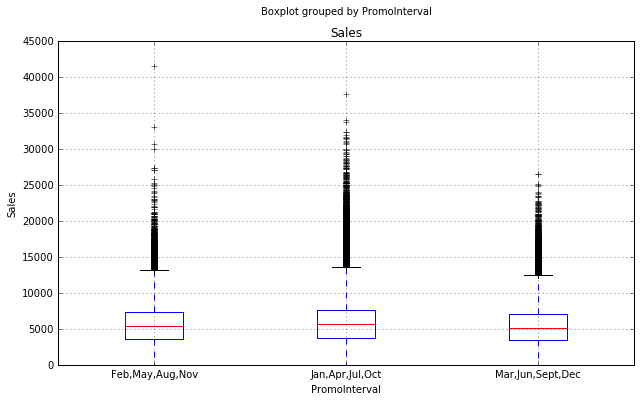

In [31]:
print "Unique values of PromoInterval:",df_store.PromoInterval.unique()
#Research relationshop between PromoInterval and sales
ax1=df_merge.boxplot(column=['Sales'],by=['PromoInterval'],figsize=(10,6))
ax1.set_xlabel("PromoInterval")
ax1.set_ylabel("Sales")

In [32]:
df_merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHoliday2,...,SundayOrNot,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,0,...,Not Sunday,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,Not Sunday,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,Not Sunday,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,...,Not Sunday,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,Not Sunday,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


The different store types and assortment types imply different overall levels of sales and seem to be exhibiting different trends:

### Store Types and Sales

In [43]:
tmp=df_merge['Sales'].groupby([df_merge['StoreType'],df_merge['Date']]).mean().unstack()
tmp.head()

Date,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,...,2015-07-22 00:00:00,2015-07-23 00:00:00,2015-07-24 00:00:00,2015-07-25 00:00:00,2015-07-26 00:00:00,2015-07-27 00:00:00,2015-07-28 00:00:00,2015-07-29 00:00:00,2015-07-30 00:00:00,2015-07-31 00:00:00
StoreType,,,,,,,,,,,,,,,,,,,,,
a,4.836938,6512.269103,5860.509967,5997.034884,4924.563123,10.388704,10122.812292,8226.707641,7138.325581,7166.235880,...,5544.745847,5971.694352,5813.583056,4729.340532,92.202658,9308.677741,8156.584718,7515.599668,7783.023256,8937.468439
b,5548.705882,7201.235294,6930.411765,6934.000000,5718.117647,7897.352941,9447.647059,8552.823529,8358.058824,8442.352941,...,9436.941176,9351.823529,9863.470588,7721.294118,12745.470588,11993.588235,11009.117647,10840.588235,11128.647059,12677.764706
c,0.000000,6329.655405,5669.986486,6009.858108,6181.587838,0.000000,9178.364865,7488.817568,6776.777027,6684.027027,...,5286.695946,5716.027027,5667.641892,5973.256757,0.000000,9661.804054,8151.304054,7646.945946,7862.202703,9109.317568
d,0.000000,5661.589080,5352.925287,5808.626437,5675.066092,9.755747,9235.364943,7308.091954,6621.497126,6622.571839,...,5257.448276,5997.571839,6020.281609,6204.882184,39.327586,9970.201149,8078.336207,7642.336207,7932.991379,9096.795977


StoreType B (in red) has sales and number of customers higher than those of other store types.

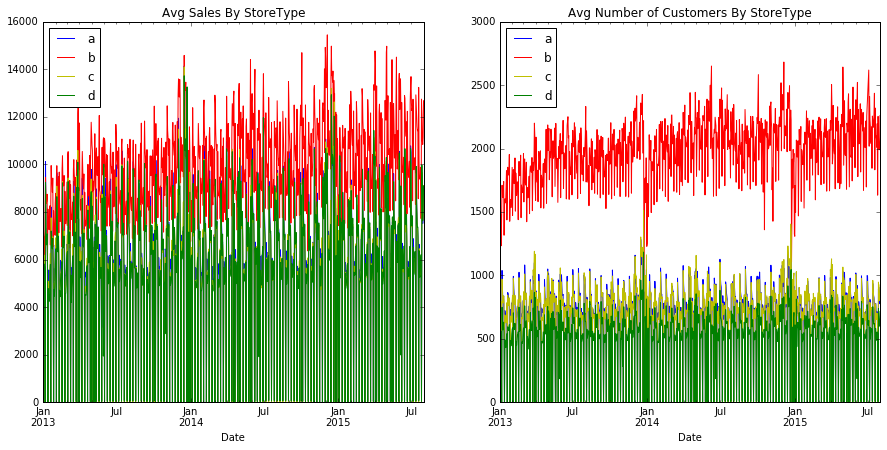

In [68]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(221)
ax1=df_merge[(df_merge['StoreType']=='a')].groupby(['Date'])['Sales'].mean().plot(color='b',label="a")
ax1=df_merge[(df_merge['StoreType']=='b')].groupby(['Date'])['Sales'].mean().plot(color='r',label="b")
ax1=df_merge[(df_merge['StoreType']=='c')].groupby(['Date'])['Sales'].mean().plot(color='y',label="c")
ax1=df_merge[(df_merge['StoreType']=='d')].groupby(['Date'])['Sales'].mean().plot(color='g',label="d")
ax1.legend(loc='best')
ax1.set_title("Avg Sales By StoreType")

ax2=fig.add_subplot(222)
ax2=df_merge[(df_merge['StoreType']=='a')].groupby(['Date'])['Customers'].mean().plot(color='b',label="a")
ax2=df_merge[(df_merge['StoreType']=='b')].groupby(['Date'])['Customers'].mean().plot(color='r',label="b")
ax2=df_merge[(df_merge['StoreType']=='c')].groupby(['Date'])['Customers'].mean().plot(color='y',label="c")
ax2=df_merge[(df_merge['StoreType']=='d')].groupby(['Date'])['Customers'].mean().plot(color='g',label="d")
ax2.legend(loc='best')
ax2.set_title("Avg Number of Customers By StoreType")

Assortment type B (in red) has sales and number of customers higher than those of other assortments.

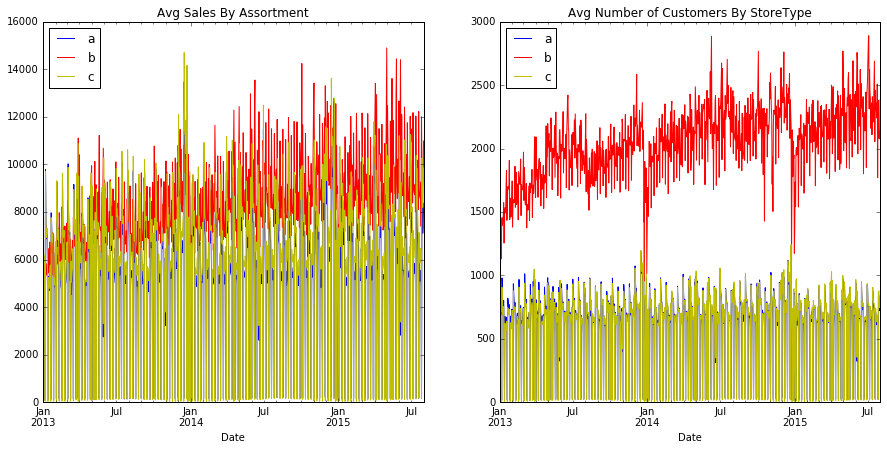

In [69]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(221)
ax1=df_merge[(df_merge['Assortment']=='a')].groupby(['Date'])['Sales'].mean().plot(color='b',label="a")
ax1=df_merge[(df_merge['Assortment']=='b')].groupby(['Date'])['Sales'].mean().plot(color='r',label="b")
ax1=df_merge[(df_merge['Assortment']=='c')].groupby(['Date'])['Sales'].mean().plot(color='y',label="c")
ax1.legend(loc='best')
ax1.set_title("Avg Sales By Assortment")

ax2=fig.add_subplot(222)
ax2=df_merge[(df_merge['Assortment']=='a')].groupby(['Date'])['Customers'].mean().plot(color='b',label="a")
ax2=df_merge[(df_merge['Assortment']=='b')].groupby(['Date'])['Customers'].mean().plot(color='r',label="b")
ax2=df_merge[(df_merge['Assortment']=='c')].groupby(['Date'])['Customers'].mean().plot(color='y',label="c")
ax2.legend(loc='best')
ax2.set_title("Avg Number of Customers By StoreType")